In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
# A (a : angulo en radianes, n : número de iteraciones)
def seno_taylor(a, n):
  seno = 0
  for i in range (n):
    seno += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
  return seno


x = math.radians(30)
iter = 10
seno = seno_taylor(x, iter)
seno_real = math.sin(x)
print('Seno por serie de Taylor:', seno, 'vs. Seno real:', seno_real)
print('Cumple que son iguales?:',seno == seno_real)

Seno por serie de Taylor: 0.49999999999999994 vs. Seno real: 0.49999999999999994
Cumple que son iguales?: True


In [12]:
# B
def taylor_sin_with_tolerance(a, tolerance):
  sin = 0
  real = math.sin
  i = 0
  while abs(real(a)-sin) > tolerance:
    sin += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
    i += 1
  return sin, i

x = math.radians(80)
tolerance = np.finfo(np.float32).eps # Definido para Epsilon de la máquina
seno, N = taylor_sin_with_tolerance(x, tolerance)
seno_real = math.sin(x)
print('Seno por serie de Taylor empleando un límite para ', N, 'iteraciones:', seno, 'vs. Seno real:', seno_real)

Seno por serie de Taylor empleando un límite para  6 iteraciones: 0.9848077408146284 vs. Seno real: 0.984807753012208


In [13]:
#C
x = math.radians(80)
tolerance = np.finfo(np.float64).eps # Definido para Epsilon de la máquina
seno, N = taylor_sin_with_tolerance(x, tolerance)
seno_real = math.sin(x)
print('Seno de taylor', N, 'términos.', seno, 'vs. Seno real:', seno_real)

Seno de taylor 10 términos. 0.9848077530122078 vs. Seno real: 0.984807753012208


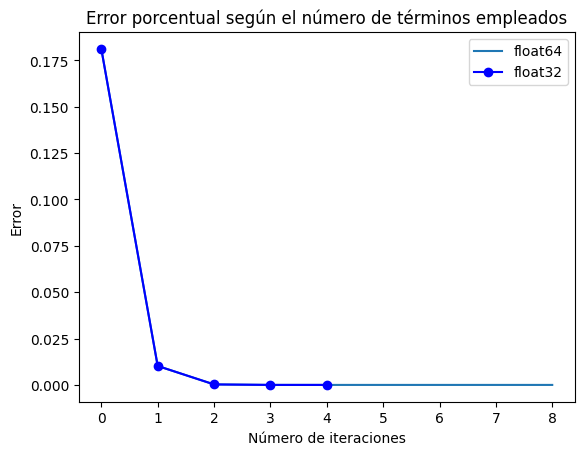

In [14]:
#D
def taylor_errors(a,tolerance):
  max_iter, sin, real_sin, i = 100, 0, math.sin(a), 0
  errors, iteraciones = np.zeros(max_iter), np.arange(max_iter)
  while abs(real_sin - sin) > tolerance:
    sin += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
    error = abs(real_sin - sin)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], sin

x = math.radians(60)
tol64 = np.finfo(np.float64).eps
tol32 = np.finfo(np.float32).eps
error64, n64, sin64 = taylor_errors(x, tol64)
error32, n32, sin32 = taylor_errors(x, tol32)
plt.plot(n64, error64, label = 'float64')
plt.plot(n32, error32, 'bo-', label = 'float32')
plt.title('Error porcentual según el número de términos empleados')
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()

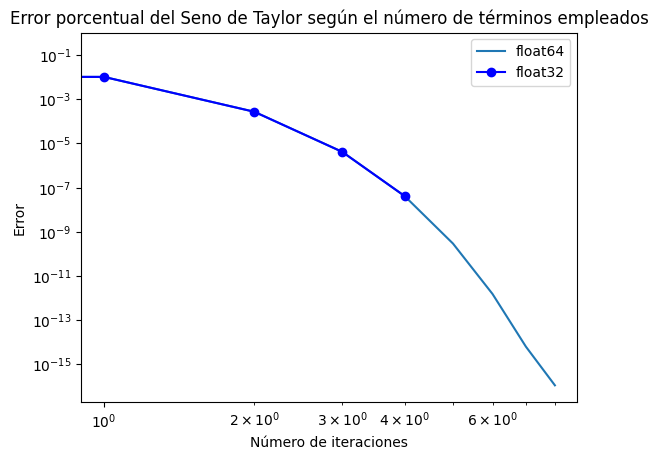

In [15]:
plt.plot(n64, error64, label = 'float64') # Log
plt.plot(n32, error32, 'bo-', label = 'float32')
plt.yscale('log')
plt.xscale('log')
plt.title('Error porcentual del Seno de Taylor según el número de términos empleados')
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [19]:
#A
def taylor_expo(x,tol):
  exp=0
  e_real=np.exp(-x)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  while abs(e_real-exp)>tol:
    exp+=((-1)**j) * (x**j) / math.factorial(j)
    #print(exp)
    j=j+1
    if j>max_iter:
      break
  print('j:',j,', e_real:',e_real,', miexp:',exp)


def taylor_expo32(x_32,tol32):
  exp=0
  e_real=np.exp(-x_32)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  while abs(e_real-exp)>tol32:
    exp+=((-1)**j) * (x_32**j) / math.factorial(j)
    error=abs(e_real-exp)
    errors[j]=error
    #print(exp)
    j=j+1
    if j>max_iter:
      break
  iteraciones32=j
  print('iteraciones',iteraciones32,', e_real:',e_real,', miexp:',exp)


x_32=0.3
tol_32=np.finfo(np.float32).eps #epsilon
taylor_expo32(x_32,tol_32)

iteraciones 7 , e_real: 0.7408182206817179 , miexp: 0.7408182624999999


In [20]:
x1 = np.linspace(1, 11, 100)
1/np.exp(201)
taylor_expo(201, 1e-7)


j: 0 , e_real: 5.09107080895011e-88 , miexp: 0


In [21]:
#B
def taylor_expo_a(x32,tol32):
  iteraciones32=13
  exp=0
  e_real=np.exp(-x32)
  max_iter=100
  j=0
  for j in range(0,iteraciones32):
      print('j',j)
      exp+=((-1)**j) * (x32**j) / math.factorial(j)
      siguiente=((-x32)**(j+1))/math.factorial(j+1)
      print('siguiente',siguiente)
      suma=10**(-7)*exp
      print('suma',suma)
      if abs(siguiente)<=abs(suma):
        break
  print('jtotal',j)


In [22]:
x32=0.3
tol_32=np.finfo(np.float32).eps #epsilon
taylor_expo_a(x32,tol_32)

j 0
siguiente -0.3
suma 1e-07
j 1
siguiente 0.045
suma 6.999999999999999e-08
j 2
siguiente -0.0045
suma 7.45e-08
j 3
siguiente 0.00033749999999999996
suma 7.405e-08
j 4
siguiente -2.0249999999999994e-05
suma 7.408375e-08
j 5
siguiente 1.0124999999999998e-06
suma 7.4081725e-08
j 6
siguiente -4.339285714285713e-08
suma 7.408182624999999e-08
jtotal 6


In [23]:
#C
def taylor_expo32_b(x32,tol32):
  exp=0
  e_real=np.exp(-x32)
  max_iter=100
  j=0
  errors=np.zeros(max_iter) #guardar el error
  iteraciones= np.arange(max_iter) #iteracion asociada al error
  for j in range(0,9):
    exp+=((-1)**j) * (x32**j) / math.factorial(j)
  term10=((-1)**10) * (x32**10) / math.factorial(10)
  term9=((-1)**9) * (x32**9) / math.factorial(9)
  cancel=term10+term9
  print(exp, term10, term9, 'cancelacion', cancel)

In [24]:
x32=10
tol_32=np.finfo(np.float32).eps #epsilon de la maquina
taylor_expo32_b(x32,tol_32)

1342.5873015873017 2755.731922398589 -2755.731922398589 cancelacion 0.0


In [26]:
#D
def taylor_expo_e(x):
  exp=0
  e_real=np.exp(-x)
  j=0
  errors=np.zeros(101) #guardar el error
  iteraciones= np.arange(101) #iteracion asociada al error
  for j in range(0,101):
    exp+=((-1)**j) * (x**j) / math.factorial(j)

  error_=abs(e_real-exp)
  return error_


In [27]:
taylor_expo_e(1)

1.1102230246251565e-16

In [28]:
np.linspace(0,100,20)

array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
        21.05263158,  26.31578947,  31.57894737,  36.84210526,
        42.10526316,  47.36842105,  52.63157895,  57.89473684,
        63.15789474,  68.42105263,  73.68421053,  78.94736842,
        84.21052632,  89.47368421,  94.73684211, 100.        ])

In [29]:
errors_=np.zeros(101)
x_=np.zeros(101)
for x in range(0,101):
  x_[x]=x
  errors_[x]=taylor_expo_e(x)
print(errors_)
print(x_)

[0.00000000e+00 1.11022302e-16 5.55111512e-17 4.16333634e-17
 2.63677968e-16 1.43982049e-15 1.79717352e-15 1.15111913e-14
 4.95605076e-14 7.49073113e-14 3.28877130e-13 1.27741170e-12
 3.19182420e-13 1.57516648e-12 3.93906134e-12 3.19161394e-11
 7.76723586e-12 4.25015123e-10 6.28703942e-10 2.70041144e-09
 1.51334333e-09 3.91528445e-09 2.41830530e-08 2.76016655e-08
 2.36455972e-07 6.68969956e-07 1.34665796e-06 4.47412389e-06
 5.01691001e-06 5.50957548e-05 8.55301518e-05 1.55878642e-04
 2.59745995e-04 8.49219715e-04 9.03442276e-03 7.95190127e-03
 7.48558915e-03 8.64751549e-02 1.87019213e-01 4.06211804e+00
 4.90920248e+01 5.82701843e+02 6.66165112e+03 7.12327180e+04
 7.21536421e+05 6.93451664e+06 6.34082895e+07 5.52771789e+08
 4.60375268e+09 3.66989626e+10 2.80505300e+11 2.05919835e+12
 1.45414053e+13 9.89254647e+13 6.49246617e+14 4.11608306e+15
 2.52390723e+16 1.49861702e+17 8.62625630e+17 4.81870054e+18
 2.61487889e+19 1.37976055e+20 7.08569569e+20 3.54458173e+21
 1.72866362e+22 8.225485

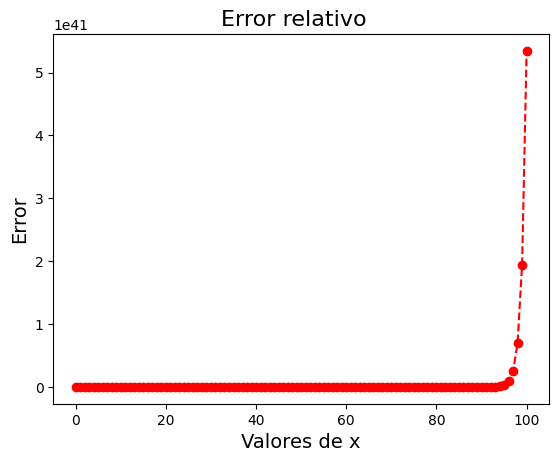

In [30]:
plt.plot(errors_, 'ro--')
plt.xlabel('Valores de x', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Error relativo  ',fontsize=16)
plt.show()

In [31]:
#E
def taylor_inv(x,inc):
  real_value=np.exp(x)
  #print(real_value)
  result=0
  max_iter=30
  i=0
  results=np.zeros(max_iter)
  while (real_value-result)>inc:
    result+=(x**i)/math.factorial(i)
    results[i]=result
    #print(result)
    i+=1
    if abs(result-real_value)<=inc:
      #print('error',result-real_value)
      break
    if i>=30:
      break
  print(results)

  print('iter',i,'    real',real_value, '    pos',result,'   neg', )

  e_real_n=np.exp(-x)
  e_neg=0
  for result in results:
    e_neg=1/result
    error=abs((e_neg)-(e_real_n))
    if error<=inc:
      break
  ubicacion = np.where(results == result)
  print(e_neg, 'real', e_real_n,'  result', ubicacion)

In [32]:
x=10
inc=np.finfo(np.float32).eps
taylor_inv(10,inc)


[1.00000000e+00 1.10000000e+01 6.10000000e+01 2.27666667e+02
 6.44333333e+02 1.47766667e+03 2.86655556e+03 4.85068254e+03
 7.33084127e+03 1.00865732e+04 1.28423051e+04 1.53475160e+04
 1.74351917e+04 1.90410960e+04 2.01881706e+04 2.09528870e+04
 2.14308347e+04 2.17119804e+04 2.18681725e+04 2.19503788e+04
 2.19914820e+04 2.20110550e+04 2.20199518e+04 2.20238199e+04
 2.20254317e+04 2.20260764e+04 2.20263243e+04 2.20264162e+04
 2.20264490e+04 2.20264603e+04]
iter 30     real 22026.465794806718     pos 22026.460266271286    neg
4.547215139175042e-05 real 4.5399929762484854e-05   result (array([20]),)


In [33]:
x_32=10
tol_32=np.finfo(np.float32).eps #epsilon
taylor_expo32(x_32,tol_32)

iteraciones 39 , e_real: 4.5399929762484854e-05 , miexp: 4.5439110291729325e-05


# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [35]:
#A
def S1(N):
  sum = 0
  for n in range(2*N):
    a = (-1)**n
    b = n/( n+1)
    sum += a*b
  return sum, n

def S2(N):
  sum1, sum2 = 0, 0
  total = 0
  for n in range(N):
    if n == 0:
      none = 0
    else:
      sum1 += 2*n/(2*n + 1)
      sum2 += (2*n -1)/(2*n)
      total += sum1 - sum2
  return total, n

def S3(N):
  sum = 0
  for n in range(N):
    if n == 0:
      none = 0
    else:
      sum += 1/(2*n*(2*n + 1))
  return sum, n

In [36]:
#B
def S1_N(N):
    suma = 0
    for n in range(1, 2 * N + 1):
        suma += (-1)**(n-1) * n / (n + 1)
    return suma

def S2_N(N):
    suma_impares = 0
    for n in range(1, N + 1):
        suma_impares += -(2 * n - 1) / (2 * n)

    suma_pares = 0
    for n in range(1, N + 1):
        suma_pares += (2 * n) / (2 * n + 1)

    return suma_impares + suma_pares

def S3_N(N):
    suma = 0
    for n in range(1, N + 1):
        suma += 1 / (2 * n * (2 * n + 1))
    return suma

In [37]:
N_valores = [10, 100, 1000, 10000, 100000]

for N in N_valores:
  s1 = S1_N(N)
  s2 = S2_N(N)
  s3 = S3_N(N)
  print(f"N = {N}: S1 = {s1:.6f}, S2 = {s2:.6f}, S3 = {s3:.6f}")

N = 10: S1 = -0.283610, S2 = 0.283610, S3 = 0.283610
N = 100: S1 = -0.304371, S2 = 0.304371, S3 = 0.304371
N = 1000: S1 = -0.306603, S2 = 0.306603, S3 = 0.306603
N = 10000: S1 = -0.306828, S2 = 0.306828, S3 = 0.306828
N = 100000: S1 = -0.306850, S2 = 0.306850, S3 = 0.306850


In [38]:
#C
N_valores = np.logspace(0, 6, num=100, dtype=int)  # 100 puntos entre 1 y 10^6

#Errores relativos para S1_N y S2_N
ES1, ES2 = [], []

for N in N_valores:
    s1 = S1_N(N)
    s2 = S2_N(N)
    s3 = S3_N(N)

    ES1.append(abs((s1 - s3) / s3))
    ES2.append(abs((s2 - s3) / s3))

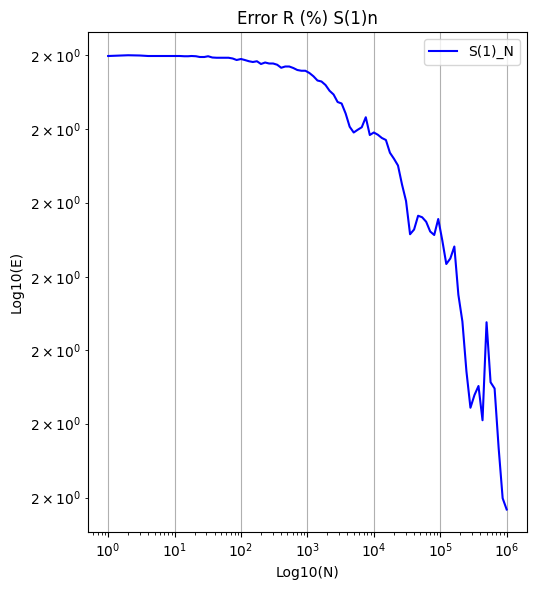

In [42]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.loglog(N_valores, ES1, color = 'b', linestyle='-', label='S(1)_N')
plt.title('Error R (%) S(1)n')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

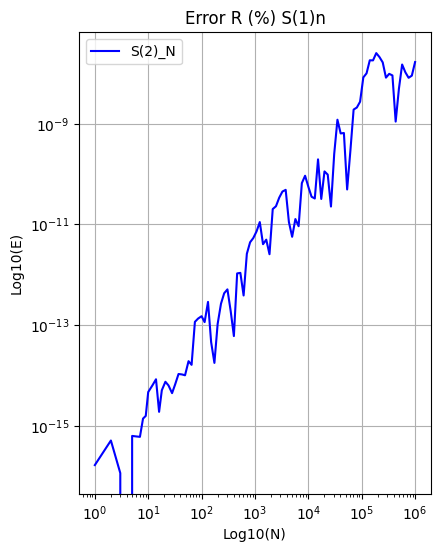

In [43]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.loglog(N_valores, ES2, color = 'b', linestyle='-', label='S(2)_N')
plt.title('Error R (%) S(1)n')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

In [44]:
#D
#Los mejores resultados se aparecian con S(3)_N porque no hay cancelación sustractiva, esta se ve que afecta de manera negativa a la presición
#porque en S(2) hay mayor precisión y se cambia el algoritmo sustractivo
#además en S(1) donde menor precisión hay  es donde aparece más plenamente la suma sustractiva